In [2]:
import numpy as np
import pandas as pd
import string
import re

# digits, len == 0 remove 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


import contractions
import pkg_resources
from symspellpy import SymSpell
# Remove accented characters
# imports
import unicodedata

import nltk
# from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
Tokeniser = TweetTokenizer()
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amoghnigam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amoghnigam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amoghnigam/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('./clean_tweet.csv')
df

clean_text  category  \
0       when modi promised “minimum government maximum...      -1.0   
1       talk all the nonsense and continue all the dra...       0.0   
2       what did just say vote for modi  welcome bjp t...       1.0   
3       asking his supporters prefix chowkidar their n...       1.0   
4       answer who among these the most powerful world...       1.0   
...                                                   ...       ...   
162963  why these 456 crores paid neerav modi not reco...      -1.0   
162964  dear rss terrorist payal gawar what about modi...      -1.0   
162965  did you cover her interaction forum where she ...       0.0   
162966  there big project came into india modi dream p...       0.0   
162967  have you ever listen about like gurukul where ...       1.0   

        word_counts  chars_count  \
0                33          210   
1                13           68   
2                22          117   
3                34          212   
4                14           81   
...             ...          ...   
162963           18          108   
162964           36          248   
162965            9           51   
162966           13           77   
162967           34          216   

                                               post_clean  \
0       modi promise minimum government maximum govern...   
1                  talk nonsense continue drama vote modi   
2       say vote modi welcome bjp told rahul main camp...   
3       ask supporter prefix chowkidar name modi great...   
4       answer among powerful world leader today trump...   
...                                                   ...   
162963  crore paid neerav modi not recover congress le...   
162964  dear terrorist payal gawar modi kill plus musl...   
162965                       cover interaction forum left   
162966  big project come india modi dream project not ...   
162967  ever listen like gurukul discipline maintain e...   

                                           not_post_clean  
0       modi promise minimum government maximum govern...  
1                  talk nonsense continue drama vote modi  
2       say vote modi welcome bjp told rahul main camp...  
3       ask supporter prefix chowkidar name modi great...  
4       answer among powerful world leader today trump...  
...                                                   ...  
162963  crore paid neerav modi recover congress leader...  
162964  dear terrorist payal gawar modi kill plus musl...  
162965                       cover interaction forum left  
162966  big project come india modi dream project happ...  
162967  ever listen like gurukul discipline maintain e...  

[162968 rows x 6 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162968 entries, 0 to 162967
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   clean_text      162968 non-null  object 
 1   category        162968 non-null  float64
 2   word_counts     162968 non-null  int64  
 3   chars_count     162968 non-null  int64  
 4   post_clean      162888 non-null  object 
 5   not_post_clean  162886 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.5+ MB


In [74]:
df[df['post_clean'].isnull()]
# 80

clean_text  category  word_counts  chars_count post_clean  \
1987           there you        0.0            2           10        NaN   
3911            what out        0.0            2            9        NaN   
4585           then then        0.0            2           10        NaN   
8010    what doing doing        0.0            3           17        NaN   
13607                 did       0.0            1            3        NaN   
...                   ...       ...          ...          ...        ...   
145264             doing        0.0            1            6        NaN   
150133        once more\n       1.0            2           10        NaN   
155175          same for        0.0            2            9        NaN   
157317    and once again        0.0            3           15        NaN   
161335               2019       0.0            1            4        NaN   

       not_post_clean  
1987              NaN  
3911              NaN  
4585              NaN  
8010              NaN  
13607             NaN  
...               ...  
145264            NaN  
150133            NaN  
155175            NaN  
157317            NaN  
161335            NaN  

[80 rows x 6 columns]

In [45]:
df[df['not_post_clean'].isnull()]
# 82

category  word_counts  chars_count post_clean not_post_clean
1987         0.0            2           10        NaN            NaN
3911         0.0            2            9        NaN            NaN
4585         0.0            2           10        NaN            NaN
8010         0.0            3           17        NaN            NaN
13607        0.0            1            3        NaN            NaN
...          ...          ...          ...        ...            ...
145264       0.0            1            6        NaN            NaN
150133       1.0            2           10        NaN            NaN
155175       0.0            2            9        NaN            NaN
157317       0.0            3           15        NaN            NaN
161335       0.0            1            4        NaN            NaN

[82 rows x 5 columns]

In [49]:
df[df['post_clean']==""]
# 0

Empty DataFrame
Columns: [category, word_counts, chars_count, post_clean, not_post_clean]
Index: []

In [50]:
df[df['not_post_clean']==""]
# 0

Empty DataFrame
Columns: [category, word_counts, chars_count, post_clean, not_post_clean]
Index: []

In [90]:
df[df.post_clean.duplicated(keep=False) == True]
# 8469
# md = df.loc[df['post_clean']=='award wapsi gang never return prize money modi']
# md

clean_text  category  \
6       surat women perform yagna seeks divine grace f...       0.0   
13      one vote can make all the difference anil kapo...       0.0   
32      modi govts slashing indias education budget cl...      -1.0   
35                                             only modi        0.0   
63      \nthis new india this indias century because h...       1.0   
...                                                   ...       ...   
162800  award wapsi gang never returned any prize mone...       0.0   
162827  inspired ⁦ modis speech lata mangeshkar pays m...       0.0   
162874                                     you hate modi       -1.0   
162912                          modi the making for 2040        0.0   
162919                                    vote only modi        0.0   

        word_counts  chars_count  \
6                12           76   
13               21          128   
32               33          208   
35                2           10   
63               23          129   
...             ...          ...   
162800            9           54   
162827           13           80   
162874            3           14   
162912            5           25   
162919            3           15   

                                               post_clean  \
6       surat woman perform yagna seek divine grace na...   
13      one vote make difference anil kapoor answer mo...   
32      modi govts slash india education budget clear ...   
35                                                   modi   
63      new india india century yuva shakti take great...   
...                                                   ...   
162800     award wapsi gang never return prize money modi   
162827  inspire modis speech lata mangeshkar pay move ...   
162874                                          hate modi   
162912                                          modi make   
162919                                          vote modi   

                                           not_post_clean  
6       surat woman perform yagna seek divine grace na...  
13      one vote make difference anil kapoor answer mo...  
32      modi govts slash india education budget clear ...  
35                                                   modi  
63      new india india century yuva shakti take great...  
...                                                   ...  
162800     award wapsi gang never return prize money modi  
162827  inspire modis speech lata mangeshkar pay move ...  
162874                                          hate modi  
162912                                          modi make  
162919                                          vote modi  

[8469 rows x 6 columns]

In [3]:
df.drop(["clean_text"],axis=1, inplace=True)
df.drop(df[df['post_clean'].isna()].index, inplace=True)
df.drop(df[df['not_post_clean'].isna()].index, inplace=True)
df.drop_duplicates(subset=['category', 'post_clean', 'not_post_clean'], keep='first', inplace=True)
df.reset_index(inplace=True, drop=True)

In [117]:
df.describe(include='all')

category    word_counts    chars_count post_clean not_post_clean  \
count   157712.000000  157712.000000  157712.000000     157712         157712   
unique            NaN            NaN            NaN     157643         157525   
top               NaN            NaN            NaN       modi           modi   
freq              NaN            NaN            NaN          3              6   
mean         0.226647      20.293224     125.467517        NaN            NaN   
std          0.785089      10.812519      67.454157        NaN            NaN   
min         -1.000000       1.000000       3.000000        NaN            NaN   
25%          0.000000      11.000000      68.000000        NaN            NaN   
50%          0.000000      19.000000     115.000000        NaN            NaN   
75%          1.000000      29.000000     184.000000        NaN            NaN   
max          1.000000      52.000000     274.000000        NaN            NaN   

        post_clean_token  not_post_clean_token  
count      157712.000000         157712.000000  
unique               NaN                   NaN  
top                  NaN                   NaN  
freq                 NaN                   NaN  
mean           14.325245             14.035692  
std             7.557606              7.411333  
min             1.000000              1.000000  
25%             8.000000              8.000000  
50%            13.000000             13.000000  
75%            20.000000             20.000000  
max            60.000000             60.000000

In [104]:
df.sample(10)

category  word_counts  chars_count  \
32219       -1.0           20          122   
25918        1.0           18          101   
85832       -1.0           26          152   
27213        1.0           39          243   
128123       0.0            8           44   
91409       -1.0           13           91   
101385      -1.0           30          202   
109255       1.0           15           95   
20365        1.0           37          223   
117318       1.0           13           89   

                                               post_clean  \
32219   corrupt idiot farooq blabbering look cheap min...   
25918   purely bcoz not position dent damage oppositio...   
85832   modi namumkin hai row empty chair modi meerut ...   
27213   wow conveniently paint indian election black w...   
128123                                   come budget modi   
91409   hello little sister promote article maximum ex...   
101385  must pitch everybody bjp quit politicsanyway b...   
109255  lol meant pure muslim wud vote modi anyway who...   
20365   state bjp gen secty young dynamic leader shri ...   
117318  ram madhavs absence modis rally raise many eye...   

                                           not_post_clean  
32219   corrupt idiot farooq blabbering look cheap min...  
25918   purely bcoz position dent damage opposition ca...  
85832   modi namumkin hai row empty chair modi meerut ...  
27213   wow conveniently paint indian election black w...  
128123                                   come budget modi  
91409   hello little sister promote article maximum ex...  
101385  must pitch everybody bjp quit politicsanyway b...  
109255  lol meant pure muslim wud vote modi anyway who...  
20365   state bjp gen secty young dynamic leader shri ...  
117318  ram madhavs absence modis rally raise many eye...

In [4]:
total = df.category.value_counts()
percentage=round(df.category.value_counts(normalize=True)*100,2)
pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])

Total  Percentage
 1.0  70527       44.72
 0.0  52403       33.23
-1.0  34782       22.05

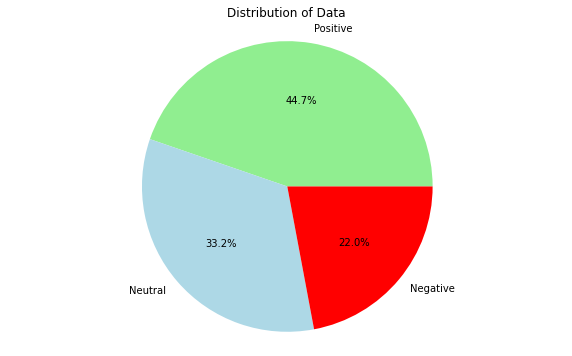

In [127]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.facecolor"] = 'white'

plt.pie(percentage, labels=['Positive','Neutral','Negative'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'red'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution of Data')

plt.show()

In [5]:
df['post_clean_token']=df['post_clean'].apply(lambda x: len(str(x).split()))
df.head()

category  word_counts  chars_count  \
0      -1.0           33          210   
1       0.0           13           68   
2       1.0           22          117   
3       1.0           34          212   
4       1.0           14           81   

                                          post_clean  \
0  modi promise minimum government maximum govern...   
1             talk nonsense continue drama vote modi   
2  say vote modi welcome bjp told rahul main camp...   
3  ask supporter prefix chowkidar name modi great...   
4  answer among powerful world leader today trump...   

                                      not_post_clean  post_clean_token  
0  modi promise minimum government maximum govern...                22  
1             talk nonsense continue drama vote modi                 6  
2  say vote modi welcome bjp told rahul main camp...                13  
3  ask supporter prefix chowkidar name modi great...                20  
4  answer among powerful world leader today trump...                10

In [6]:
df['not_post_clean_token']=df['not_post_clean'].apply(lambda x: len(str(x).split()))
df.head()

category  word_counts  chars_count  \
0      -1.0           33          210   
1       0.0           13           68   
2       1.0           22          117   
3       1.0           34          212   
4       1.0           14           81   

                                          post_clean  \
0  modi promise minimum government maximum govern...   
1             talk nonsense continue drama vote modi   
2  say vote modi welcome bjp told rahul main camp...   
3  ask supporter prefix chowkidar name modi great...   
4  answer among powerful world leader today trump...   

                                      not_post_clean  post_clean_token  \
0  modi promise minimum government maximum govern...                22   
1             talk nonsense continue drama vote modi                 6   
2  say vote modi welcome bjp told rahul main camp...                13   
3  ask supporter prefix chowkidar name modi great...                20   
4  answer among powerful world leader today trump...                10   

   not_post_clean_token  
0                    21  
1                     6  
2                    13  
3                    19  
4                    10

In [1]:
df.to_csv('cleaner_tweet.csv', header=True, index=False)

NameError: name 'df' is not defined

In [4]:
df = pd.read_csv('./cleaner_tweet.csv')

<h1>post_clean</h1>
"not" stopword is contained 
<h1>not_post_clean</h1>
"not" stopword is NOT contained 

In [17]:
df.sample(10)

category  word_counts  chars_count  \
36061        1.0           24          147   
73018        0.0            8           46   
15494       -1.0           29          170   
86577        0.0           27          164   
29101        1.0           14           77   
2639         1.0           27          168   
22259        0.0           14           86   
45193        1.0           17           94   
148934       1.0           15          108   
13794        0.0           23          141   

                                               post_clean  \
36061   loose last election due modi wave subsequently...   
73018           congratulation modi jii isro jai hind sir   
15494   dear not think every corrupt political leader ...   
86577   user face network issue call service provider ...   
29101   mani shankar aiyar call modi ouster well tie p...   
2639    opinion narendra modi follow many people twitt...   
22259   sunanda sister cogrs bjp primeminister modi no...   
45193   friend modi capacity want modi love modi yes w...   
148934  main bhi chowkidar campaign narendra modi inte...   
13794   understand restlessness not wry arvind kejriwa...   

                                           not_post_clean  post_clean_token  \
36061   loose last election due modi wave subsequently...                16   
73018           congratulation modi jii isro jai hind sir                 7   
15494   dear think every corrupt political leader modi...                18   
86577   user face network issue call service provider ...                18   
29101   mani shankar aiyar call modi ouster well tie p...                10   
2639    opinion narendra modi follow many people twitt...                22   
22259   sunanda sister cogrs bjp primeminister modi think                 8   
45193   friend modi capacity want modi love modi yes w...                15   
148934  main bhi chowkidar campaign narendra modi inte...                13   
13794   understand restlessness wry arvind kejriwal ke...                15   

        not_post_clean_token  
36061                     16  
73018                      7  
15494                     15  
86577                     18  
29101                     10  
2639                      22  
22259                      7  
45193                     15  
148934                    13  
13794                     14

In [147]:
post_clean_lt = list(df['post_clean'])

In [5]:
df_negative = df[df["category"]==-1.0].copy()
df_positive = df[df["category"]==1.0].copy()
df_neutral = df[df["category"]==0.0].copy()

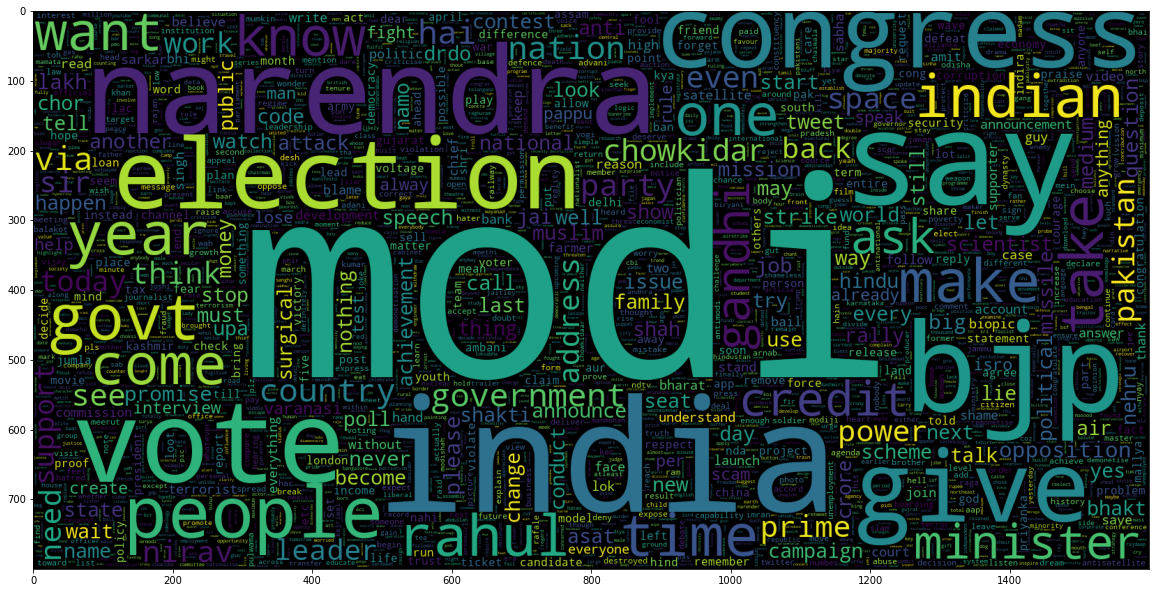

In [8]:
# Wordcloud for neutral tweets
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.facecolor"] = 'white'
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df_neutral['post_clean']))
plt.imshow(wc)

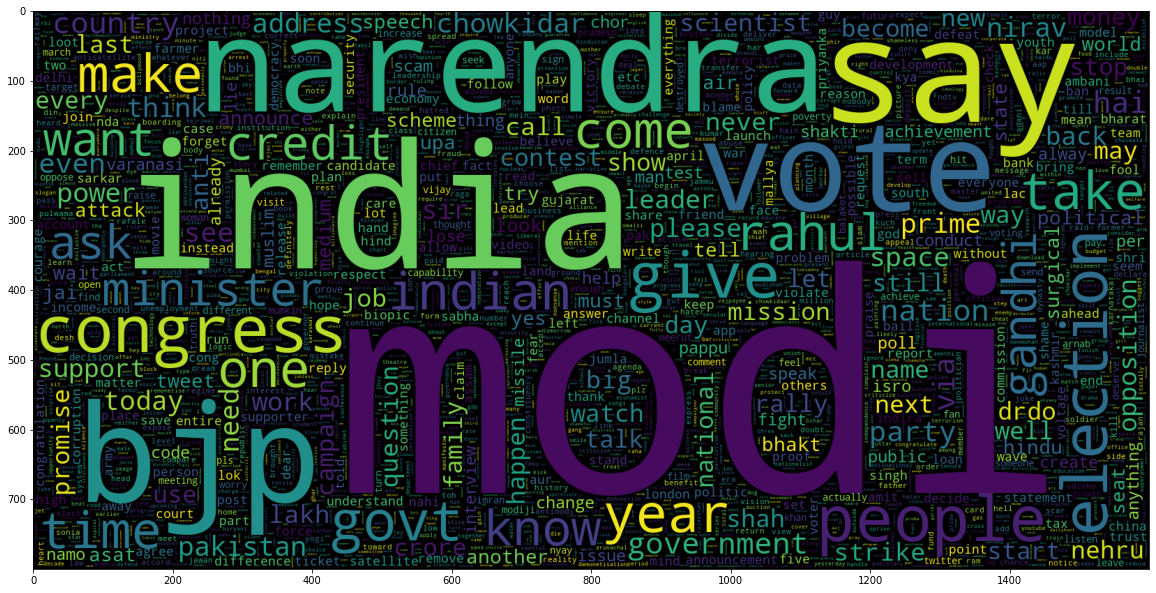

In [9]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df_neutral['not_post_clean']))
plt.imshow(wc)

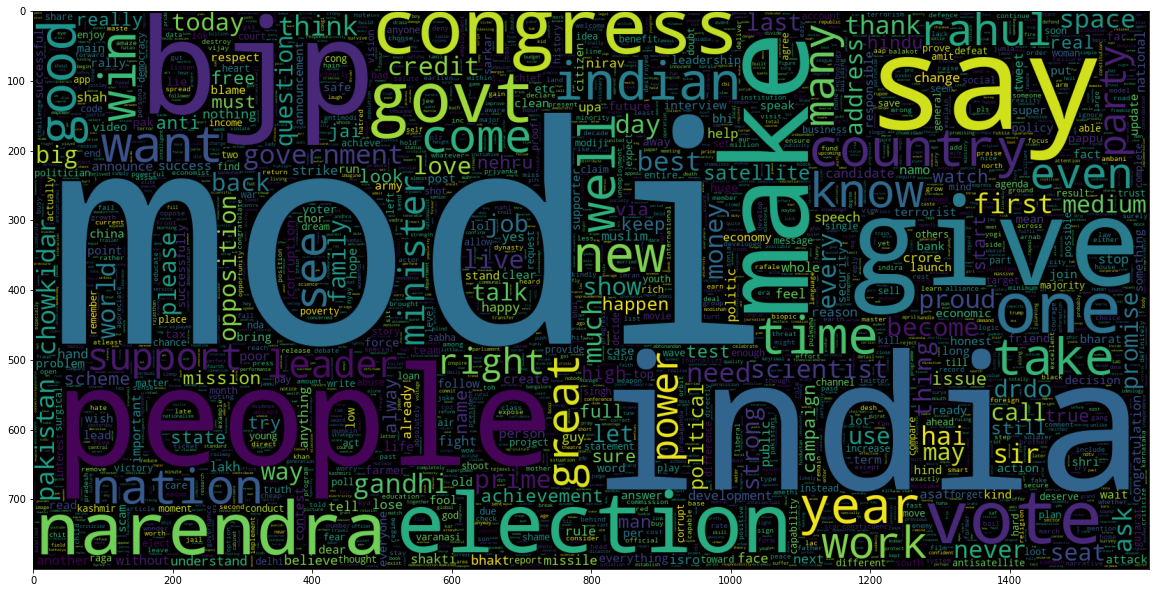

In [10]:
# Wordcloud for positive tweets
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df_positive['post_clean']))
plt.imshow(wc)

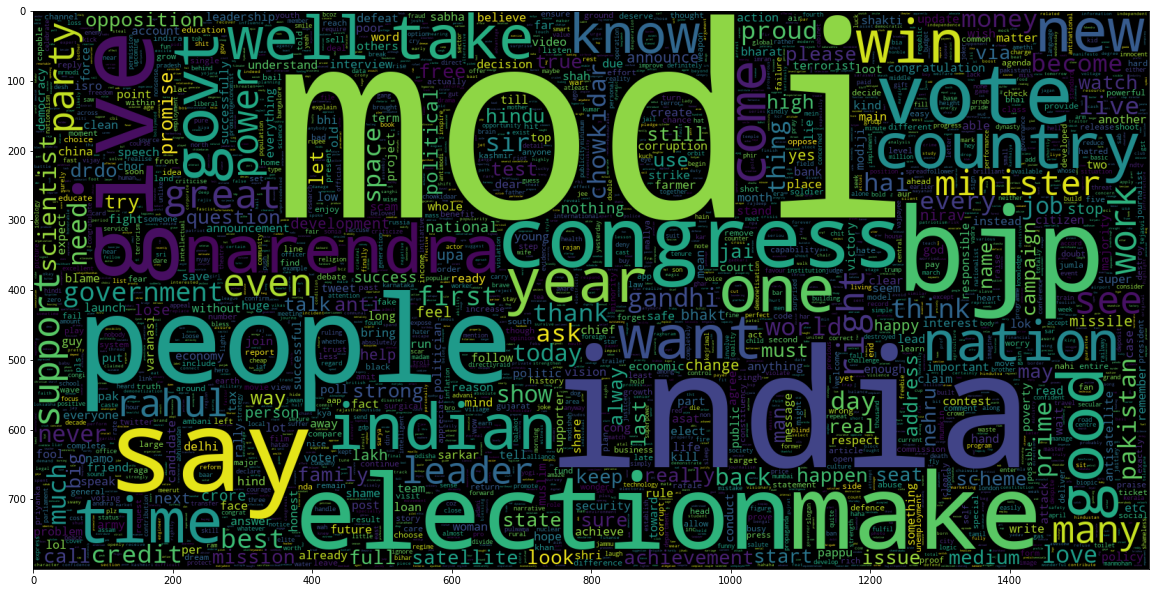

In [11]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df_positive['not_post_clean']))
plt.imshow(wc)

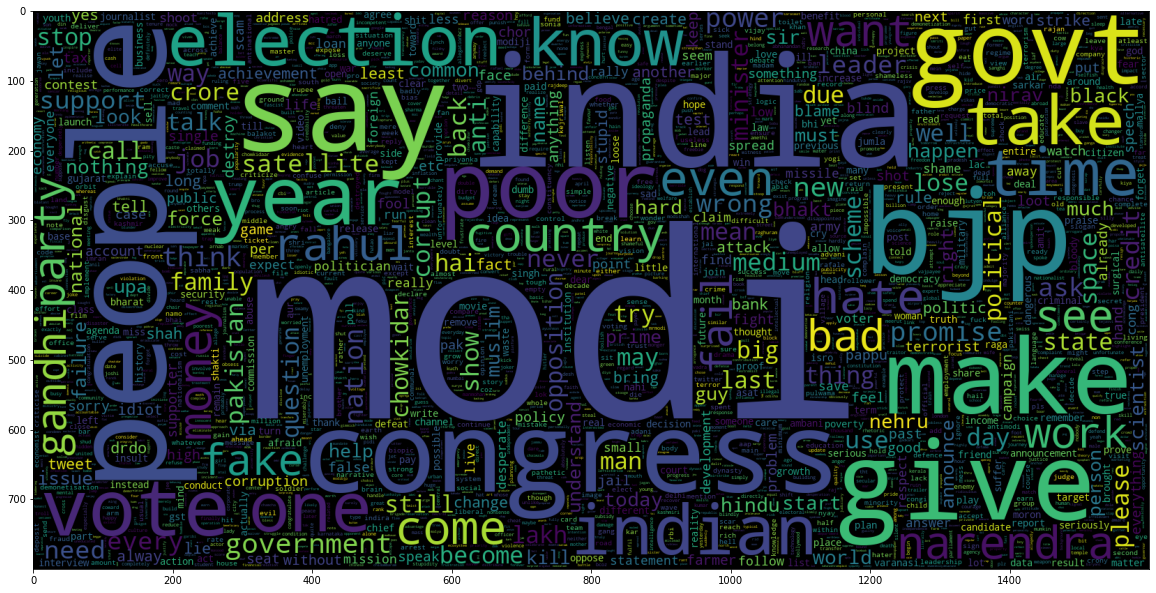

In [12]:
# Wordcloud for Negative tweets
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df_negative['post_clean']))
plt.imshow(wc)

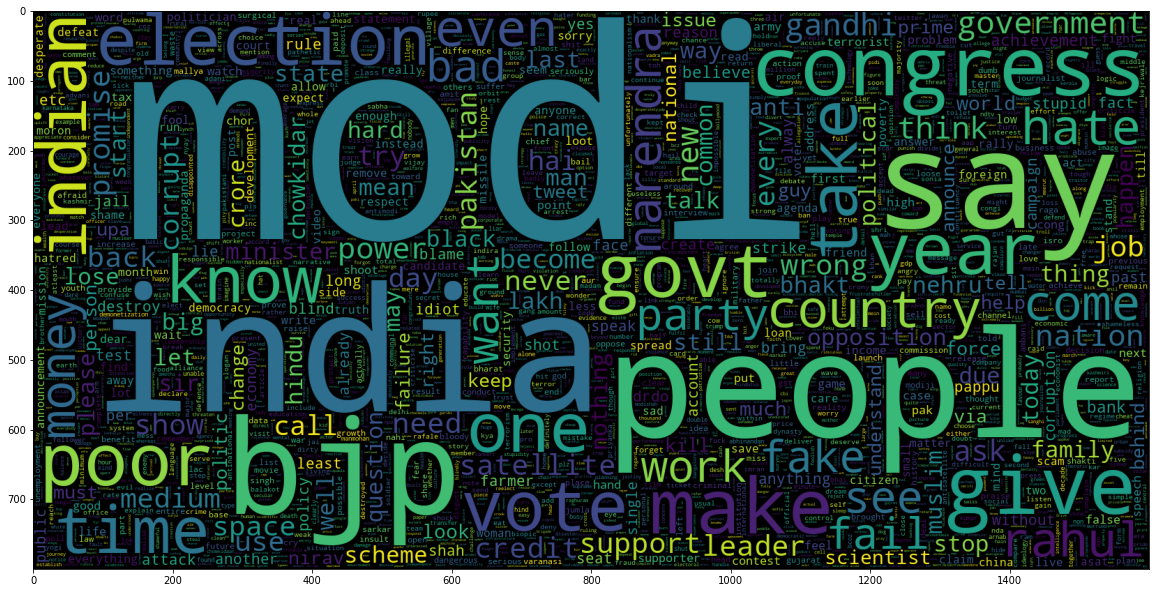

In [13]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df_negative['not_post_clean']))
plt.imshow(wc)

In [ ]:
# spell check and translation left 

In [ ]:
# model analysis 
# 1. Naive Bayes
# 2. Support Vector Machines (SVM)
# 3. Random Forests
# 4. XG Boost
# 5. Logistic Regression
# 6. Ensemble O/P

In [ ]:
# There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

# 1. Gaussian Naïve Bayes
# 2. Multinomial Naïve Bayes
# 3. Bernoulli Naïve Bayes

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
max_df = 25 means "ignore terms that appear in more than 25 documents".
The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". 
Thus, the default setting does not ignore any terms.

min_df is used for removing terms that appear too infrequently. For example:

min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
min_df = 5 means "ignore terms that appear in less than 5 documents".
The default min_df is 1, which means "ignore terms that appear in less than 1 document". 
Thus, the default setting does not ignore any terms.

In [4]:
def tf_idf_vec(X_train, X_valid, X_test):
    vectorizer= TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3),)
    tf_x_train = vectorizer.fit_transform(X_train)
    tf_x_valid = vectorizer.transform(X_valid)
    tf_x_test = vectorizer.transform(X_test)
    return tf_x_train, tf_x_valid, tf_x_test

In [5]:
# Let's say we want to split the data in 70:15:15 for train:valid:test dataset
def split_df(df, split_size, col):
    df2 = df[[col, 'category']].copy()
    X = df2[col]
    y = df2['category']
    # reduce overfitting using validation
    # In the first step we will split the data in training and remaining dataset
    X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=split_size, random_state=0)
    # Now since we want the valid and test size to be equal (15% each of overall data). 
    # we have to define valid_size=0.5 (that is 50% of remaining data)
    test_size = 0.5
    X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=0)
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [6]:
X_train, y_train, X_valid, y_valid, X_test, y_test = split_df(df,0.7, 'post_clean')

In [7]:
X_train_not, y_train_not, X_valid_not, y_valid_not, X_test_not, y_test_not = split_df(df,0.7, 'not_post_clean')

In [8]:
tf_x_train, tf_x_valid, tf_x_test = tf_idf_vec(X_train, X_valid, X_test)

In [9]:
tf_x_train_not, tf_x_valid_not, tf_x_test_not = tf_idf_vec(X_train_not, X_valid_not, X_test_not)

In [14]:
model = MultinomialNB()
model.fit(tf_x_train_not, y_train_not)
y_pred = model.predict(tf_x_valid_not)
cm = confusion_matrix(y_valid_not, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid, y_pred))

[[  308   116  4795]
 [   13  1592  6144]
 [   12   156 10521]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.92      0.06      0.11      5219
         0.0       0.85      0.21      0.33      7749
         1.0       0.49      0.98      0.65     10689

    accuracy                           0.53     23657
   macro avg       0.76      0.42      0.37     23657
weighted avg       0.71      0.53      0.43     23657



In [15]:
accuracies = cross_val_score(estimator = model, X = tf_x_train_not, y = y_train_not, cv = 10)   #K-Fold Validation
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


K-Fold Validation Mean Accuracy: 51.61 %

Standard Deviation: 0.25 %


In [18]:
model = MultinomialNB()
model.fit(tf_x_train, y_train)
y_pred = model.predict(tf_x_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid, y_pred))
accuracies = cross_val_score(estimator = model, X = tf_x_train, y = y_train, cv = 10)   #K-Fold Validation
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[  306   113  4800]
 [   13  1588  6148]
 [   12   152 10525]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.92      0.06      0.11      5219
         0.0       0.86      0.20      0.33      7749
         1.0       0.49      0.98      0.65     10689

    accuracy                           0.52     23657
   macro avg       0.76      0.42      0.37     23657
weighted avg       0.71      0.52      0.43     23657


K-Fold Validation Mean Accuracy: 51.54 %

Standard Deviation: 0.26 %


In [19]:
model = LinearSVC(random_state=0)
model.fit(tf_x_train_not, y_train_not)
y_pred = model.predict(tf_x_valid_not)
cm = confusion_matrix(y_valid_not, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid_not, y_pred))
accuracies = cross_val_score(estimator = model, X = tf_x_train_not, y = y_train_not, cv = 10)   #K-Fold Validation
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[4051  312  856]
 [ 362 6408  979]
 [ 564  521 9604]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.81      0.78      0.79      5219
         0.0       0.88      0.83      0.85      7749
         1.0       0.84      0.90      0.87     10689

    accuracy                           0.85     23657
   macro avg       0.85      0.83      0.84     23657
weighted avg       0.85      0.85      0.85     23657


K-Fold Validation Mean Accuracy: 84.19 %

Standard Deviation: 0.13 %


In [20]:
model = LinearSVC(random_state=0)
model.fit(tf_x_train, y_train)
y_pred = model.predict(tf_x_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid, y_pred))
accuracies = cross_val_score(estimator = model, X = tf_x_train, y = y_train, cv = 10)   #K-Fold Validation
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[4069  326  824]
 [ 361 6426  962]
 [ 541  526 9622]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.82      0.78      0.80      5219
         0.0       0.88      0.83      0.86      7749
         1.0       0.84      0.90      0.87     10689

    accuracy                           0.85     23657
   macro avg       0.85      0.84      0.84     23657
weighted avg       0.85      0.85      0.85     23657


K-Fold Validation Mean Accuracy: 84.37 %

Standard Deviation: 0.19 %


In [23]:
model = LogisticRegression(max_iter=1000,solver='saga', C = 1.0, random_state=0)
model.fit(tf_x_train_not, y_train_not)
y_pred = model.predict(tf_x_valid_not)
cm = confusion_matrix(y_valid_not, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid_not, y_pred))
accuracies = cross_val_score(estimator = model, X = tf_x_train_not, y = y_train_not, cv = 10)   #K-Fold Validation
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[3635  559 1025]
 [ 261 6463 1025]
 [ 518  742 9429]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.82      0.70      0.75      5219
         0.0       0.83      0.83      0.83      7749
         1.0       0.82      0.88      0.85     10689

    accuracy                           0.83     23657
   macro avg       0.83      0.80      0.81     23657
weighted avg       0.83      0.83      0.82     23657


K-Fold Validation Mean Accuracy: 81.02 %

Standard Deviation: 0.24 %


In [24]:
model = LogisticRegression(max_iter=1000,solver='saga',C=1.0, random_state=0)
model.fit(tf_x_train, y_train)
y_pred = model.predict(tf_x_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid, y_pred))
accuracies = cross_val_score(estimator = model, X = tf_x_train, y = y_train, cv = 10)   #K-Fold Validation
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[3658  555 1006]
 [ 283 6437 1029]
 [ 530  737 9422]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.82      0.70      0.76      5219
         0.0       0.83      0.83      0.83      7749
         1.0       0.82      0.88      0.85     10689

    accuracy                           0.82     23657
   macro avg       0.82      0.80      0.81     23657
weighted avg       0.82      0.82      0.82     23657


K-Fold Validation Mean Accuracy: 81.03 %

Standard Deviation: 0.24 %


In [11]:
model = RandomForestClassifier(random_state=0)
model.fit(tf_x_train_not, y_train_not)
y_pred = model.predict(tf_x_valid_not)
cm = confusion_matrix(y_valid_not, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid_not, y_pred))
# accuracies = cross_val_score(estimator = model, X = tf_x_train_not, y = y_train_not, cv = 4)   #K-Fold Validation
# print('')
# print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print('')
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[    0     0  5219]
 [    0     2  7747]
 [    0     0 10689]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      5219
         0.0       1.00      0.00      0.00      7749
         1.0       0.45      1.00      0.62     10689

    accuracy                           0.45     23657
   macro avg       0.48      0.33      0.21     23657
weighted avg       0.53      0.45      0.28     23657



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

KeyboardInterrupt: 

In [ ]:
model = RandomForestClassifier(random_state=0)
model.fit(tf_x_train, y_train)
y_pred = model.predict(tf_x_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid, y_pred))
accuracies = cross_val_score(estimator = model, X = tf_x_train, y = y_train, cv = 10)   #K-Fold Validation
print('')
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_not = le.fit_transform(y_train_not)


In [14]:
model = XGBClassifier(objective='multi:softprob', eval_metric='auc', random_state=0)
model.fit(tf_x_train_not, y_train_not)
y_pred = model.predict(tf_x_valid_not)
cm = confusion_matrix(y_valid_not, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid_not, y_pred))
# accuracies = cross_val_score(estimator = model, X = tf_x_train_not, y = y_train_not, cv = 10)   #K-Fold Validation
# print('')
# print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print('')
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[   0 3180 1352  687]
 [   0   93 7466  190]
 [   0  537 1965 8187]
 [   0    0    0    0]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      5219
         0.0       0.02      0.01      0.02      7749
         1.0       0.18      0.18      0.18     10689
         2.0       0.00      0.00      0.00         0

    accuracy                           0.09     23657
   macro avg       0.05      0.05      0.05     23657
weighted avg       0.09      0.09      0.09     23657



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

KeyboardInterrupt: 

In [16]:
y_train = le.fit_transform(y_train)

In [19]:
model = XGBClassifier(n_estimators = 80,max_depth=4, learning_rate=0.2, random_state=0)
model.fit(tf_x_train, y_train)
y_pred = model.predict(tf_x_valid)
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(" ")
print('classification_report: ', classification_report(y_valid, y_pred))
# accuracies = cross_val_score(estimator = model, X = tf_x_train, y = y_train, cv = 10)   #K-Fold Validation
# print('')
# print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print('')
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[   0 2322 2156  741]
 [   0   72 7449  228]
 [   0  410 2924 7355]
 [   0    0    0    0]]
 
classification_report:                precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      5219
         0.0       0.03      0.01      0.01      7749
         1.0       0.23      0.27      0.25     10689
         2.0       0.00      0.00      0.00         0

    accuracy                           0.13     23657
   macro avg       0.06      0.07      0.07     23657
weighted avg       0.11      0.13      0.12     23657



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [21]:
def train_cv(model, X_train, y_train, params, n_splits=5, scoring='f1_weighted'):
    kf = KFold(n_splits=n_splits, random_state=0, shuffle=True)

    cv = RandomizedSearchCV(model,
                        params,
                        cv=kf,
                        scoring=scoring,
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=2,
                        random_state=1
                        )
    cv.fit(X_train, y_train)

    print('Best params', cv.best_params_)
    return cv

In [24]:
svm_parameters = {
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}

In [ ]:
mnb_parameters = {'nb__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [17]:
ls_parameters = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'C': uniform(scale=10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'l1_ratio': uniform(scale=10)
    }

In [ ]:
# chanllenges -> 
# data cleaning
# spell check
# lang translation
